In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix ,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cardio.csv', delimiter=';')

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
x = df.drop("cardio",axis=1)
y = df['cardio']
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size =0.25,random_state = 10 )

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_x= scaler.transform(x)

In [ ]:
pca = PCA(n_components=8)
pca.fit(scaled_x)
pca_x =pca.transform(scaled_x)
pca_x.shape

(70000, 8)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#decision tree

dt = DecisionTreeClassifier(criterion='entropy',max_depth=100, random_state=10)
dt_y_pre = cross_val_predict(dt, pca_x, y, cv=10)
dt_sc = accuracy_score(y, dt_y_pre) * 100
dt_sc = "{:.2f}".format(dt_sc)
print(dt_sc)

61.28


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#random_forest
rf = RandomForestClassifier(max_depth=100, random_state=20)
rf_y_pre = cross_val_predict(rf, pca_x, y, cv=10)
rf_sc = accuracy_score(y, rf_y_pre) * 100
rf_sc = "{:.2f}".format(rf_sc)
print(rf_sc)

69.92


In [ ]:
from sklearn.linear_model import LogisticRegression

#logisrtic regression classifier

lg = LogisticRegression(random_state=0)
lg_y_pre = cross_val_predict(lg, pca_x, y, cv=10)
lg_sc = accuracy_score(y, lg_y_pre) * 100
lg_sc = "{:.2f}".format(lg_sc)
print(lg_sc)

70.86


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn_y_pre = cross_val_predict(kn, pca_x, y, cv=10)
kn_sc = accuracy_score(y, kn_y_pre) * 100
kn_sc = "{:.2f}".format(kn_sc)
print(kn_sc)

63.50


In [ ]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('LG', lg), ('RF', rf)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.72      0.75      0.73      8844
           1       0.73      0.70      0.72      8656

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500



In [ ]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Y_test, predictions)

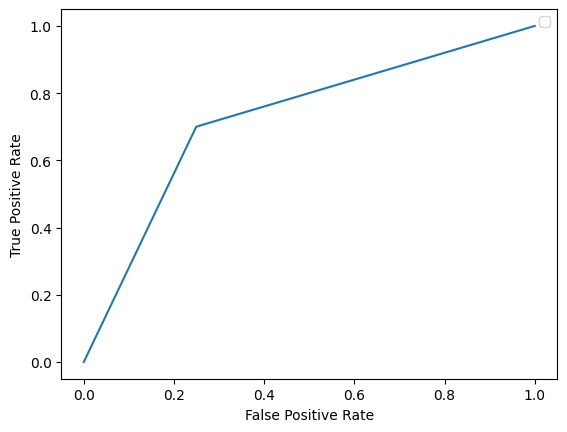

In [ ]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()